In [1]:
import os
from pathlib import Path

NOTEBOOK_PATH: Path = Path(os.path.abspath(''))

DATA_PATH: Path = NOTEBOOK_PATH.parent.joinpath('data')

PATH_FOR_RESULT: Path = NOTEBOOK_PATH.joinpath('RESULT')

if not PATH_FOR_RESULT.exists():
    PATH_FOR_RESULT.mkdir()

print(f'当前运行目录：{NOTEBOOK_PATH}')
print(f'当前数据目录：{DATA_PATH}')

当前运行目录：D:\Development\Python\InvestmentWorkshop\notebook
当前数据目录：D:\Development\Python\InvestmentWorkshop\data


# 缠论 静态版

静态版分步骤的计算缠论元素。

## 准备

### 引用模块

In [2]:
from typing import List

import pandas as pd

from utility import (
    get_available_datafile_name,
    load_csv_as_dataframe,
    get_saved_filename,
    save_dataframe_to_csv
)
from InvestmentWorkshop.indicator.chan.definition import (
    ChanTheory,
)
from InvestmentWorkshop.indicator.chan.plot import (
    plot_chan_theory
)
from InvestmentWorkshop.indicator.chan.static import (
    run_with_dataframe,
    update_merged_candles,
    update_fractals,
    generate_strokes,
    generate_segments,
    generate_isolation_lines,
    generate_stroke_pivots,
    generate_segment_pivots,
)

Load succeed.


### 设置 pandas

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

### 可用数据

In [4]:
available_datafile = get_available_datafile_name(DATA_PATH, 'Minute')
for symbol, period in available_datafile:
    print(f'symbol: {symbol:>12}, period: {period}')

symbol:    DCE.c2201, period: Minute
symbol:    DCE.i2201, period: Minute
symbol:  SHFE.ag2106, period: Minute
symbol:  SHFE.al2111, period: Minute
symbol:  SHFE.al2112, period: Minute
symbol:  SHFE.hc2110, period: Minute
symbol:  SHFE.hc2201, period: Minute
symbol:  SHFE.hc2202, period: Minute
symbol:  SHFE.rb2201, period: Minute


### 声明数据

使用分钟数据

In [5]:
symbol: str = 'SHFE.al2112'
period: str = 'Minute'
dt_start: str = '2021-10-15 13:30:00'
dt_end: str = '2021-10-19 00:59:00'

### 加载数据

In [6]:
origin_data: pd.DataFrame = load_csv_as_dataframe(DATA_PATH.joinpath(f'{symbol}_{period}.csv'))
df_ohlc: pd.DataFrame = origin_data.loc[dt_start:dt_end, ['open', 'high', 'low', 'close']]

df_ohlc.info()
print('-' * 100)
df_ohlc.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 795 entries, 2021-10-15 13:30:00 to 2021-10-19 00:59:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    795 non-null    float64
 1   high    795 non-null    float64
 2   low     795 non-null    float64
 3   close   795 non-null    float64
dtypes: float64(4)
memory usage: 31.1 KB
----------------------------------------------------------------------------------------------------


,open,high,low,close
datetime,,,,
2021-10-15 13:30:00,23900.0,23900.0,23840.0,23845.0
2021-10-15 13:31:00,23845.0,23895.0,23845.0,23895.0
2021-10-15 13:32:00,23895.0,23895.0,23855.0,23875.0
2021-10-15 13:33:00,23875.0,23895.0,23840.0,23845.0
2021-10-15 13:34:00,23845.0,23855.0,23830.0,23830.0


## 计算

### 初始化

In [7]:
count: int = 400
strict_mode: bool = True
log: bool = True
verbose: bool = True

chan_static: ChanTheory = ChanTheory(strict_mode=strict_mode)

### 合并K线

In [8]:
chan_static = update_merged_candles(chan_static, df_ohlc, count, log)


【第    0 /  399 轮】（按普通K线编号）

  ● 生成K线：
    第 1 根合并K线，起始id（普通K线）= 0，周期 = 1，high = 23900.0，low = 23840.0。

【第    1 /  399 轮】（按普通K线编号）

  ● 合并K线：
    第 1 根合并K线，起始id（普通K线）= 1，周期 = 2，high = 23900.0，low = 23840.0。

【第    2 /  399 轮】（按普通K线编号）

  ● 合并K线：
    第 1 根合并K线，起始id（普通K线）= 2，周期 = 3，high = 23900.0，low = 23840.0。

【第    3 /  399 轮】（按普通K线编号）

  ● 合并K线：
    第 1 根合并K线，起始id（普通K线）= 3，周期 = 4，high = 23900.0，low = 23840.0。

【第    4 /  399 轮】（按普通K线编号）

  ● 生成K线：
    第 2 根合并K线，起始id（普通K线）= 4，周期 = 1，high = 23855.0，low = 23830.0。

【第    5 /  399 轮】（按普通K线编号）

  ● 合并K线：
    第 2 根合并K线，起始id（普通K线）= 5，周期 = 2，high = 23855.0，low = 23830.0。

【第    6 /  399 轮】（按普通K线编号）

  ● 生成K线：
    第 3 根合并K线，起始id（普通K线）= 6，周期 = 1，high = 23900.0，low = 23875.0。

【第    7 /  399 轮】（按普通K线编号）

  ● 生成K线：
    第 4 根合并K线，起始id（普通K线）= 7，周期 = 1，high = 23915.0，low = 23880.0。

【第    8 /  399 轮】（按普通K线编号）

  ● 生成K线：
    第 5 根合并K线，起始id（普通K线）= 8，周期 = 1，high = 23890.0，low = 23845.0。

【第    9 /  399 轮】（按普通K线编号）

  ● 合并K线：
    第 5 根合并K线，起始id（普通K线）=

### 分型

In [9]:
chan_static = update_fractals(chan_static, log, verbose)


【第    0 /  248 轮】（按合并K线编号）

【第    1 /  248 轮】（按合并K线编号）

【第    2 /  248 轮】（按合并K线编号）

  ○ 尝试生成分型：
    左侧合并K线 id（合并K线）= 0，id（普通K线）= 3，最高价 = 23900.0，最低价 = 23840.0
    中间合并K线 id（合并K线）= 1，id（普通K线）= 5，最高价 = 23855.0，最低价 = 23830.0
    右侧合并K线 id（合并K线）= 2，id（普通K线）= 6，最高价 = 23900.0，最低价 = 23875.0
        中间合并K线的最高价 < 左右两侧合并K线的最高价，满足。

  ● 生成分型：
    第 1 个分型，模式 = 底分型，位置id（合并K线）= 1，位置id（普通K线）= 5。

【第    3 /  248 轮】（按合并K线编号）

  ○ 尝试生成分型：
    左侧合并K线 id（合并K线）= 1，id（普通K线）= 5，最高价 = 23855.0，最低价 = 23830.0
    中间合并K线 id（合并K线）= 2，id（普通K线）= 6，最高价 = 23900.0，最低价 = 23875.0
    右侧合并K线 id（合并K线）= 3，id（普通K线）= 7，最高价 = 23915.0，最低价 = 23880.0
        新老分型的距离 = 1，< 4，不满足。

【第    4 /  248 轮】（按合并K线编号）

  ○ 尝试生成分型：
    左侧合并K线 id（合并K线）= 2，id（普通K线）= 6，最高价 = 23900.0，最低价 = 23875.0
    中间合并K线 id（合并K线）= 3，id（普通K线）= 7，最高价 = 23915.0，最低价 = 23880.0
    右侧合并K线 id（合并K线）= 4，id（普通K线）= 9，最高价 = 23885.0，最低价 = 23845.0
        新老分型的距离 = 2，< 4，不满足。

【第    5 /  248 轮】（按合并K线编号）

  ○ 尝试生成分型：
    左侧合并K线 id（合并K线）= 3，id（普通K线）= 7，最高价 = 23915.0，最低价 = 2

### 笔

In [10]:
chan_static = generate_strokes(chan_static, log, verbose)


【第   1 /  19 轮】（按分型编号）

【第   2 /  19 轮】（按分型编号）

【第   3 /  19 轮】（按分型编号）

【第   4 /  19 轮】（按分型编号）

【第   5 /  19 轮】（按分型编号）

【第   6 /  19 轮】（按分型编号）

【第   7 /  19 轮】（按分型编号）

【第   8 /  19 轮】（按分型编号）

【第   9 /  19 轮】（按分型编号）

【第  10 /  19 轮】（按分型编号）

【第  11 /  19 轮】（按分型编号）

【第  12 /  19 轮】（按分型编号）

【第  13 /  19 轮】（按分型编号）

【第  14 /  19 轮】（按分型编号）

【第  15 /  19 轮】（按分型编号）

【第  16 /  19 轮】（按分型编号）

【第  17 /  19 轮】（按分型编号）

【第  18 /  19 轮】（按分型编号）

【第  19 /  19 轮】（按分型编号）


### 线段

In [11]:
chan_static = generate_segments(chan_static, log, verbose)


  ● 生成笔：
    第 1 个笔，趋势 = 上升，起点id（合并K线 ）= 1，终点id（合并K线）= 25，起点id（普通K线 ）= 5，终点id（普通K线）= 37。

  ● 扩展线段：
    第 1 个线段，趋势 = 上升，原终点id（合并K线）= 25，现终点id（合并K线）= 70，原终点id（普通K线）= 37，现终点id（普通K线）= 105，新增笔 = [3, 4]。


### 笔中枢

In [12]:
chan_static = generate_stroke_pivots(chan_static, log, verbose)

## 结果

### 合并K线

In [13]:
length: int = len(chan_static.merged_candles)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_static.merged_candles[i]}')

   0, MergedCandle (id = 0, period = 4, left ordinary id = 0, right ordinary id = 3, high = 23900.0, low = 23840.0)
   1, MergedCandle (id = 1, period = 2, left ordinary id = 4, right ordinary id = 5, high = 23855.0, low = 23830.0)
   2, MergedCandle (id = 2, period = 1, left ordinary id = 6, right ordinary id = 6, high = 23900.0, low = 23875.0)
   3, MergedCandle (id = 3, period = 1, left ordinary id = 7, right ordinary id = 7, high = 23915.0, low = 23880.0)
   4, MergedCandle (id = 4, period = 2, left ordinary id = 8, right ordinary id = 9, high = 23885.0, low = 23845.0)
   5, MergedCandle (id = 5, period = 1, left ordinary id = 10, right ordinary id = 10, high = 23920.0, low = 23865.0)
   6, MergedCandle (id = 6, period = 1, left ordinary id = 11, right ordinary id = 11, high = 23955.0, low = 23910.0)
   7, MergedCandle (id = 7, period = 1, left ordinary id = 12, right ordinary id = 12, high = 23985.0, low = 23945.0)
   8, MergedCandle (id = 8, period = 2, left ordinary id = 13, rig

### 分型

In [14]:
length: int = len(chan_static.fractals)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_static.fractals[i]}')

  0, Fractal (id = 0, pattern = 底分型, merged id = 1, ordinary id = 5, extreme price = 23830.0, potential = 正规, confirmed = True)
  1, Fractal (id = 1, pattern = 顶分型, merged id = 7, ordinary id = 12, extreme price = 23985.0, potential = 正规, confirmed = True)
  2, Fractal (id = 2, pattern = 底分型, merged id = 15, ordinary id = 25, extreme price = 23870.0, potential = 右侧, confirmed = True)
  3, Fractal (id = 3, pattern = 顶分型, merged id = 25, ordinary id = 37, extreme price = 24015.0, potential = 右侧, confirmed = True)
  4, Fractal (id = 4, pattern = 底分型, merged id = 36, ordinary id = 54, extreme price = 23880.0, potential = 右侧, confirmed = True)
  5, Fractal (id = 5, pattern = 顶分型, merged id = 70, ordinary id = 105, extreme price = 24760.0, potential = 右侧, confirmed = True)
  6, Fractal (id = 6, pattern = 底分型, merged id = 78, ordinary id = 118, extreme price = 24435.0, potential = 右侧, confirmed = True)
  7, Fractal (id = 7, pattern = 顶分型, merged id = 91, ordinary id = 136, extreme price = 245

### 笔

In [15]:
length: int = len(chan_static.strokes)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_static.strokes[i]}')

  0, Stroke (id = 0, trend = 上升, period = 6, left merged id = 5, right merged id = 7, left ordinary id = 5, right ordinary id = 12, left price = 23830.0, right price = 23985.0)
  1, Stroke (id = 1, trend = 下降, period = 8, left merged id = 12, right merged id = 15, left ordinary id = 12, right ordinary id = 25, left price = 23985.0, right price = 23870.0)
  2, Stroke (id = 2, trend = 上升, period = 10, left merged id = 25, right merged id = 25, left ordinary id = 25, right ordinary id = 37, left price = 23870.0, right price = 24015.0)
  3, Stroke (id = 3, trend = 下降, period = 11, left merged id = 37, right merged id = 36, left ordinary id = 37, right ordinary id = 54, left price = 24015.0, right price = 23880.0)
  4, Stroke (id = 4, trend = 上升, period = 34, left merged id = 54, right merged id = 70, left ordinary id = 54, right ordinary id = 105, left price = 23880.0, right price = 24760.0)
  5, Stroke (id = 5, trend = 下降, period = 8, left merged id = 105, right merged id = 78, left ordin

### 线段

In [16]:
length: int = len(chan_static.segments)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_static.segments[i]}')

 0, Segment (id = 0, trend = 上升, left merged id = 1, right merged id = 25, left ordinary id = 5, right ordinary id = 37, count of strokes = 5, strokes = [0, 1, 2, 3, 4])


### 笔中枢

In [17]:
length: int = len(chan_static.stroke_pivots)
width: int = len(str(length - 1)) + 1

for i in range(length):
    print(f'{i:>{width}}, {chan_static.stroke_pivots[i]}')

## 绘图

2021-10-18 10:10:00
Plot done.


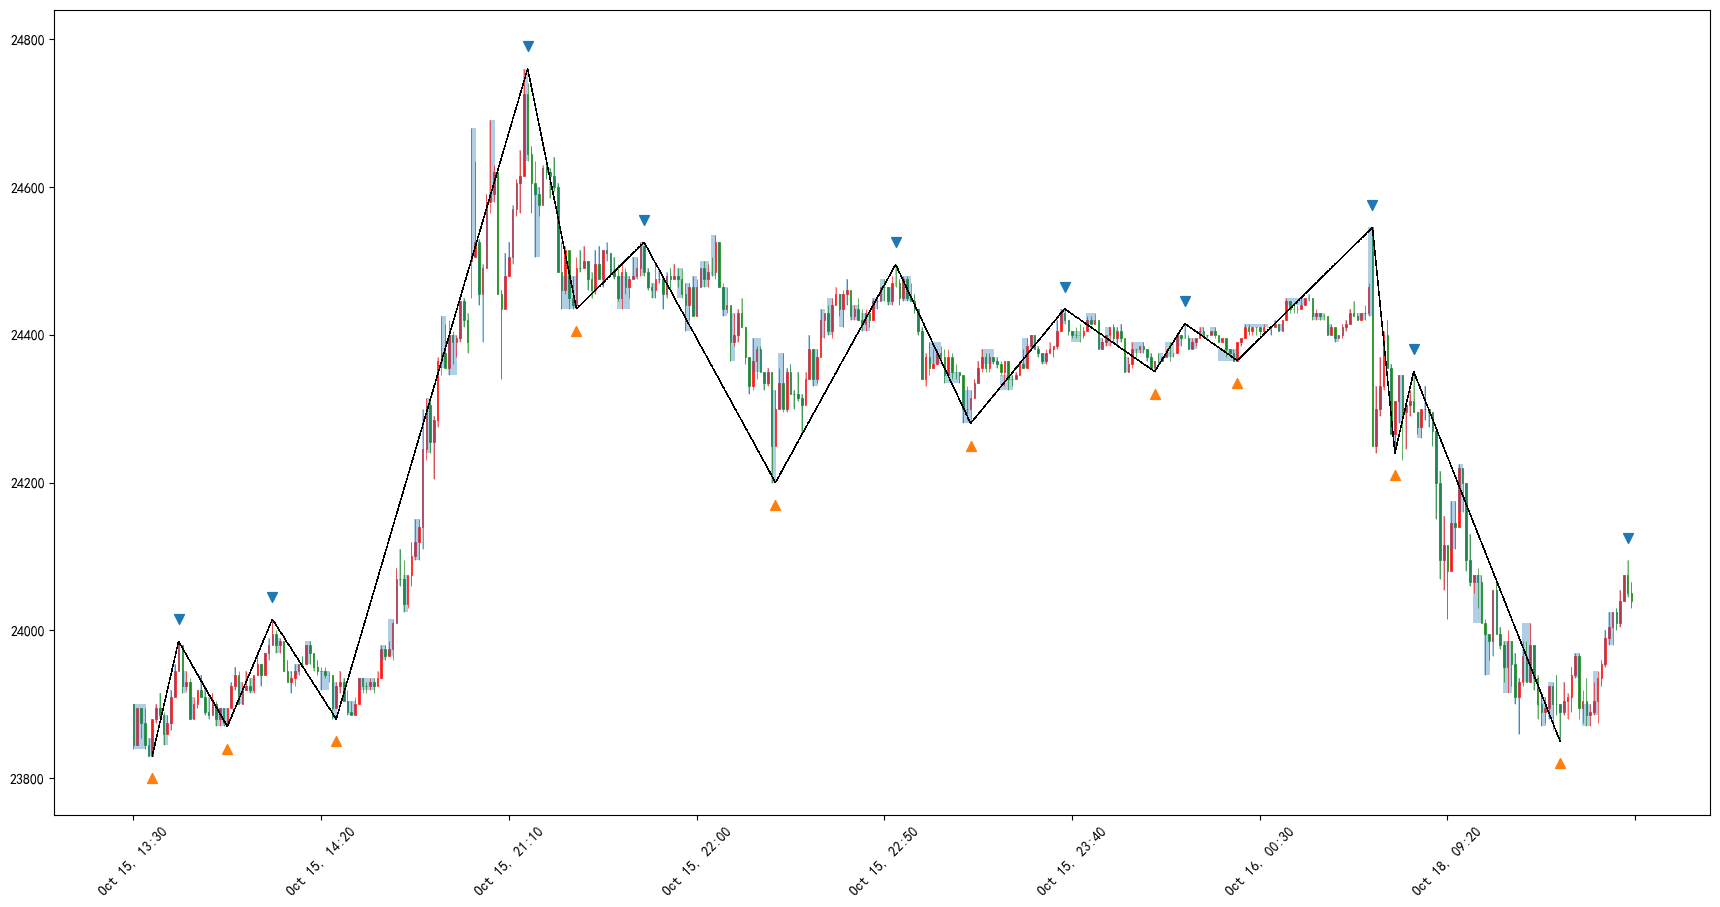

In [18]:
plot_chan_theory(
    df_ohlc,
    chan_static,
    count,
    show_ordinary_id=False,
    show_merged_id=False,
    show_all_merged=True,
    hatch_merged=False,
    fractal_marker_size=50,
    fractal_marker_offset=30
)